In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.decomposition import PCA
import os
from sklearn.linear_model import LogisticRegression

In [173]:
df = pd.read_csv('milk.csv',index_col=0)

In [174]:
df

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [175]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
df_scaled.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,0.948806,-1.009291,-0.903208,1.542217,-1.037554
ORANGUTAN,0.821407,-1.344603,-0.660619,1.040773,-1.259945
MONKEY,0.813445,-1.121062,-0.738247,1.263637,-1.381249
DONKEY,0.964731,-1.260775,-0.864394,1.152205,-0.936467
HIPPO,0.972694,-1.568145,-0.563583,0.149319,-1.542988


In [176]:
prcomp = PCA().set_output(transform='pandas')

In [177]:
pca_data = prcomp.fit_transform(df_scaled)

In [178]:
pca_data.shape

(25, 5)

In [179]:
df_scaled.shape

(25, 5)

In [180]:
pca_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [181]:
total_var = pca_data.var().sum()

In [182]:
total_var

5.208333333333337

In [183]:
#Proportion of Variance Explained by Every PC column 
pca_data.var()/total_var

pca0    0.775759
pca1    0.177479
pca2    0.025784
pca3    0.019716
pca4    0.001261
dtype: float64

In [184]:
#%  of Variance Explained by Every PC column 
(pca_data.var()/total_var)*100

pca0    77.575905
pca1    17.747950
pca2     2.578385
pca3     1.971621
pca4     0.126140
dtype: float64

In [185]:
#Keeping only first 2 columns 
# As 95% variance is explained by first 2 columns 

In [186]:
#Variation Explained 
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

In [187]:
#Proportion of Variation explained 
(prcomp.explained_variance_ratio_)*100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [188]:
prcomp.feature_names_in_

array(['water', 'protein', 'fat', 'lactose', 'ash'], dtype=object)

## With Nutrient Dataset

In [190]:
nutrient = pd.read_csv('nutrient.csv', index_col=0)

In [191]:
nutrient

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


In [192]:
scl= StandardScaler()
n_scaled = scl.fit_transform(nutrient)


In [193]:
pp = PCA().set_output(transform='pandas')
pca_data = pp.fit(n_scaled)

In [194]:
pp.explained_variance_

array([2.28079741e+00, 1.18996245e+00, 8.80317810e-01, 8.39566765e-01,
       1.66325132e-03])

In [195]:
pp.explained_variance_ratio_*100

array([4.39264687e+01, 2.29177954e+01, 1.69542689e+01, 1.61694340e+01,
       3.20329884e-02])

In [196]:
np.cumsum(pp.explained_variance_ratio_*100)

array([ 43.92646868,  66.84426409,  83.79853301,  99.96796701,
       100.        ])

# HR data example 

In [287]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split , KFold , StratifiedKFold
from sklearn.compose import make_column_selector , make_column_transformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 

In [199]:
hr = pd.read_csv('HR_comma_sep.csv')
hr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [200]:
X , y = hr.drop('left', axis=1) , hr['left']
X_train , X_test , Y_train , Y_test = train_test_split(X, y, test_size=0.3 , random_state=24 , stratify=y)

In [234]:
ohe = OneHotEncoder(sparse_output=False , drop = 'first', handle_unknown= 'ignore').set_output(transform='pandas')
ct = make_column_transformer( (ohe , make_column_selector(dtype_include=object)) ,
                             ('passthrough', make_column_selector(dtype_exclude=object)),
                            verbose_feature_names_out=False).set_output(transform='pandas')

X_trn = ct.fit_transform(X_train)
X_tst = ct.transform(X_test)

X_trn.shape

(10496, 18)

In [236]:
scaler = StandardScaler()
X_trn_scl= scaler.fit_transform(X_trn)
X_tst_scl = scaler.transform(X_tst)

In [240]:
pca = PCA().set_output(transform='pandas')
pca_data = pca.fit_transform(X_trn_scl)

pca_tst = pca.fit_transform(X_tst_scl)

In [242]:
pca.explained_variance_

array([1.86879804, 1.79806318, 1.31943503, 1.205966  , 1.1913045 ,
       1.16172995, 1.12529622, 1.09107992, 1.05762438, 1.03646846,
       0.97771635, 0.93995848, 0.86599881, 0.76769989, 0.63642002,
       0.52301736, 0.14461022, 0.10153907])

In [244]:
pca.explained_variance_ratio_

array([0.10491365, 0.10094262, 0.07407261, 0.0677025 , 0.0668794 ,
       0.0652191 , 0.06317372, 0.06125283, 0.05937465, 0.05818697,
       0.05488864, 0.05276893, 0.04861686, 0.04309839, 0.03572839,
       0.02936201, 0.00811837, 0.00570037])

In [246]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10491365, 0.20585627, 0.27992887, 0.34763137, 0.41451077,
       0.47972987, 0.5429036 , 0.60415643, 0.66353108, 0.72171804,
       0.77660669, 0.82937562, 0.87799248, 0.92109087, 0.95681926,
       0.98618127, 0.99429963, 1.        ])

In [248]:
pca.n_components_

18

### Plotting

Text(0, 0.5, 'Variation Explained')

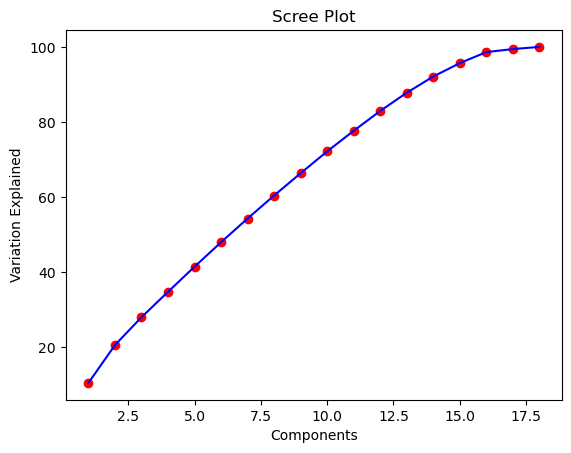

In [251]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_*100),
           c= 'red')

plt.plot(np.arange(1,pca.n_components_+1),np.cumsum(pca.explained_variance_ratio_*100), c = 'blue')
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Variation Explained')


In [253]:
lr = LogisticRegression()
selected_trn_pca = pca_data.iloc[: , :14]
lr.fit(selected_trn_pca , Y_train)

LogisticRegression()

In [261]:
y_pred = lr.predict(pca_tst.iloc[: , :14])

# Train Test accuracy

print(accuracy_score(Y_test , y_pred))

0.7510557901755945


## ON testing Dataset 

In [228]:
test_data = pd.read_csv('tst_hr.csv')
test_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.11,0.88,7,272,4,0,0,sales,medium
1,0.72,0.87,5,223,5,0,0,sales,low
2,0.37,0.52,2,159,3,0,0,sales,low
3,0.41,0.50,2,153,3,0,0,sales,low
4,0.67,0.61,3,202,2,0,0,technical,medium
5,0.76,0.62,3,150,2,1,0,technical,high
6,0.19,0.78,5,156,6,0,0,technical,medium
7,0.52,0.73,2,233,3,0,0,technical,medium
8,0.66,0.59,5,262,2,0,0,technical,medium
9,0.95,0.67,3,183,3,0,0,support,medium


In [264]:
X_tst = ct.transform(test_data)
X_tst_scl = scaler.transform(X_tst)
X_selected_pca = pca.transform(X_trn_scl)
X_selected_tst = X_selected_pca.iloc[:, :14]

y_pred = lr.predict(X_selected_tst)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Using Pipeline 

In [305]:
from sklearn.pipeline import Pipeline

In [307]:
scaler , pca , lr = StandardScaler() , PCA(n_components=16) , LogisticRegression()
pipe = Pipeline([('OHE' , ct) , ('Scaler', scaler), ('PCA', pca) , ('LR', lr)])
pipe.fit(X_train , Y_train)
y_pred = pipe.predict(X_test)

print(accuracy_score(Y_test , y_pred))


0.7719493220715714


In [309]:
# Using GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [311]:
scaler , pca , lr = StandardScaler() , PCA(n_components=None) , LogisticRegression()
pipe = Pipeline([('OHE' , ct) , ('Scaler', scaler), ('PCA', pca) , ('LR', lr)])
pipe.fit(X_train , Y_train)





Pipeline(steps=[('OHE',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027486B0ECF0>),
                                                 ('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002748736FFE0>)],
                                   verbose_feature_names_out=False)),
                ('Scaler', StandardScaler()), ('PCA', PCA()),
                ('LR', LogisticRegression())])

In [313]:
pipe.get_params()

{'memory': None,
 'steps': [('OHE',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x0000027486B0ECF0>),
                                   ('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000002748736FFE0>)],
                     verbose_feature_names_out=False)),
  ('Scaler', StandardScaler()),
  ('PCA', PCA()),
  ('LR', LogisticRegression())],
 'transform_input': None,
 'verbose': False,
 'OHE': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
    

In [329]:
paras = {'PCA__n_components': [13 ,14,15,16] ,'LR__C' : [0.001 , 0.1,0.5,1.5,2.5]} 

kfold = StratifiedKFold(n_splits= 5 , random_state=24 , shuffle=True)
gcv = GridSearchCV(pipe , param_grid=paras ,  cv = kfold , scoring='accuracy')
gcv.fit(X_train , Y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000027486B0ECF0>),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002748736FFE0>)],
                                                          verbose_feature_names_out=False)),
                                       ('Scaler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('LR', LogisticRegression())]),
             param_grid={'LR__C': [0.001, 0.1, 0.5, 1.5, 2.5],
                         'PCA__n_components': [13, 14, 15, 16]},
             scoring='accuracy')

In [330]:
y_pred = gcv.predict(X_test)
print(gcv.best_params_ , gcv.best_score_)

{'LR__C': 0.001, 'PCA__n_components': 13} 0.7873473536151001


In [331]:
y_test = gcv.predict(test_data)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
